<a href="https://colab.research.google.com/github/Krishnadayal/Data-Science-Project-Lifecycle/blob/main/finalised_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

**Data Exploration**


In [2]:
# Importing libraries for data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
kj_test = pd.read_csv("/content/test.csv")
kj_test

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24
...,...,...,...,...,...
40744,33698,Wattala,3916.48,4161.26,3916.48
40745,4185,Wattala,3191.92,3004.16,3098.04
40746,28664,Wattala,3838.6,3951.5,Three Thousand seven hundread ruppees
40747,11874,Wattala,4313.76,4183.04,4313.76


In [4]:
# Checking column names
kj_test.columns

Index(['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales'],
      dtype='object')

In [5]:
# Checking number of rows and columns in the dataset
kj_test.shape

(40749, 5)

In [6]:
# Checking data types & null values
kj_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [7]:
# Summary statistics for the string data type columns
kj_test.describe(include = object)

,outlet_city,luxury_sales,fresh_sales,dry_sales
count,40749,40749,40749,40749
unique,27,33183,36100,35771
top,Jaffna,1801.8,1161.6,2694.6
freq,2226,7,5,5


In [8]:
# Summary statisics for the numeric data type columns
kj_test.describe()

,Customer_ID
count,40749.000000
mean,20375.000000
std,11763.367396
min,1.000000
25%,10188.000000
50%,20375.000000
75%,30562.000000
max,40749.000000


In [9]:
# Checking non-numeric values in luxury_sales column
problematic_values_in_luxury_sales = kj_test[~kj_test["luxury_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_values_in_luxury_sales[["luxury_sales"]])

                           luxury_sales
6      Seven Hundread and sixty Ruppees
6299  Eight Hundread and fifteen ruppes


In [10]:
# Checking non-numeric values in fresh_sales column
problematic_values_in_fresh_sales = kj_test[~kj_test["fresh_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_values_in_luxury_sales[["fresh_sales"]])

     fresh_sales
6          914.4
6299     1548.69


In [11]:
# Checking non-numeric values in dry_sales column
problematic_values_in_dry_sales = kj_test[~kj_test["dry_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_values_in_luxury_sales[["dry_sales"]])

     dry_sales
6       3352.8
6299    5705.7


In [12]:
# Changing non-numeric values in luxury, fresh, and dry sales column
problematic_values = [6,6299,13949,40746]
kj_test.loc[problematic_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
6,10364,batticaloa,Seven Hundread and sixty Ruppees,914.4,3352.8
6299,4059,Anuradhapura,Eight Hundread and fifteen ruppes,1548.69,5705.7
13949,28662,Jaffna,2195.84,Nine thousand ruppess,1509.64
40746,28664,Wattala,3838.6,3951.5,Three Thousand seven hundread ruppees


In [13]:
# Changing non-numeric values into numeric values
kj_test.loc[6,"luxury_sales"] = 760
kj_test.loc[6299,"luxury_sales"] = 815
kj_test.loc[13949,"fresh_sales"] = 9000
kj_test.loc[40746,"dry_sales"] = 3700

In [14]:
# Checking the changed values
cleaned_problematic_values = [6,6299,13949,40746]
kj_test.loc[cleaned_problematic_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
6,10364,batticaloa,760,914.4,3352.8
6299,4059,Anuradhapura,815,1548.69,5705.7
13949,28662,Jaffna,2195.84,9000,1509.64
40746,28664,Wattala,3838.6,3951.5,3700


In [15]:
# Changing the datatypes of the columns
kj_test = kj_test.astype({"luxury_sales": float, "fresh_sales": float, "dry_sales": float})
kj_test.dtypes

,0
Customer_ID,int64
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64


In [16]:
# Checking number of missing values per column
number_of_missing_values_per_column = kj_test.isnull().sum()
number_of_missing_values_per_column

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0


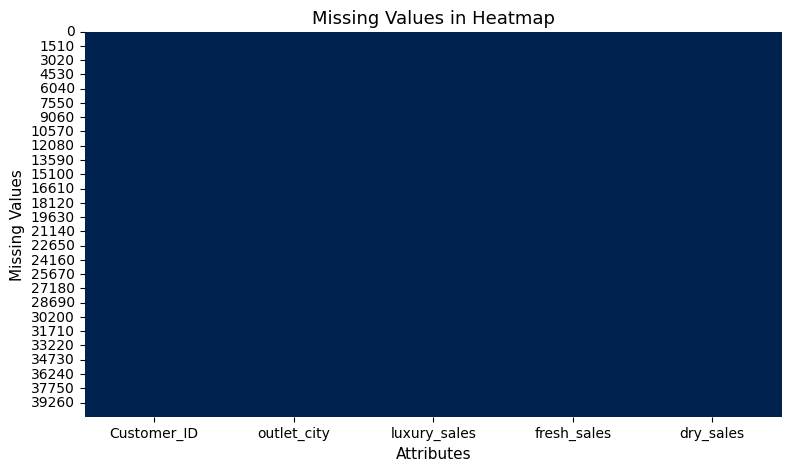

In [17]:
# Checking missing values using heatmap
plt.figure(figsize = [9,5])
sns.heatmap(data = kj_test.isnull(), cbar = False, cmap = "cividis")
plt.title("Missing Values in Heatmap", fontsize = 13)
plt.xlabel("Attributes", fontsize = 11)
plt.ylabel("Missing Values", fontsize = 11)
plt.show()

In [18]:
# Checking duplicated rows and customer id in the dataset
print(f'Number of fully duplicated rows: {kj_test.duplicated().sum()}')
print(f'Number of duplicated values in customer ID:{(kj_test["Customer_ID"].duplicated().sum())}')

Number of fully duplicated rows: 0
Number of duplicated values in customer ID:0


In [19]:
# Checking outliers in luxury sales using IQR method
q1 = kj_test["luxury_sales"].quantile(0.25)
q3 = kj_test["luxury_sales"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
luxury_sales_outliers = kj_test[(kj_test["luxury_sales"] < lower_bound) | (kj_test["luxury_sales"] > upper_bound)]
print(f"Number of outliers in luxury_sales: {len(luxury_sales_outliers)}")

outliers_percentage = (len(luxury_sales_outliers) / len(kj_test)) * 100

print(f"Percentage of outliers in luxury_sales: {outliers_percentage:.2f}%")
luxury_sales_outliers

Number of outliers in luxury_sales: 1841
Percentage of outliers in luxury_sales: 4.52%


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
1867,10570,Batticaloa,5516.94,5684.12,5349.76
1876,26248,Batticaloa,5272.74,5112.96,4953.18
1878,32536,Batticaloa,4911.00,5402.10,5729.50
1884,26771,Batticaloa,4597.44,4741.11,4597.44
1886,32639,Batticaloa,4428.50,4428.50,4428.50
...,...,...,...,...,...
40736,23816,Wattala,4388.04,4000.86,4258.98
40737,7447,Wattala,4261.29,4132.16,4519.55
40739,29599,Wattala,4103.12,4103.12,3861.76
40747,11874,Wattala,4313.76,4183.04,4313.76


In [20]:
# Checking outliers in fresh sales using IQR method
q1 = kj_test["fresh_sales"].quantile(0.25)
q3 = kj_test["fresh_sales"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
fresh_sales_outliers = kj_test[(kj_test["fresh_sales"] < lower_bound) | (kj_test["fresh_sales"] > upper_bound)]
print(f"Number of outliers in fresh_sales: {len(fresh_sales_outliers)}")
outliers_percentage = (len(fresh_sales_outliers) / len(kj_test)) * 100
print(f"Percentage of outliers in fresh_sales: {outliers_percentage:.2f}%")
fresh_sales_outliers

Number of outliers in fresh_sales: 0
Percentage of outliers in fresh_sales: 0.00%


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales


In [21]:
# Checking outliers in dry sales using IQR method
q1 = kj_test["dry_sales"].quantile(0.25)
q3 = kj_test["dry_sales"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
dry_sales_outliers = kj_test[(kj_test["dry_sales"] < lower_bound) | (kj_test["dry_sales"] > upper_bound)]
print(f"Number of outliers in dry_sales: {len(dry_sales_outliers)}")
outliers_percentage = (len(dry_sales_outliers) / len(kj_test)) * 100
print(f"Percentage of outliers in dry_sales: {outliers_percentage:.2f}%")
dry_sales_outliers

Number of outliers in dry_sales: 0
Percentage of outliers in dry_sales: 0.00%


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales


In [23]:
# Checking the number of unique values per column
print(f"Number of unique values in Customer ID column: {kj_test['Customer_ID'].nunique()}")
print(f"Number of unique values in outlet_city column: {kj_test['outlet_city'].nunique()}")
print(f"Number of unique values in luxury_sales column: {kj_test['luxury_sales'].nunique()}")
print(f"Number of unique values in fresh_sales column: {kj_test['fresh_sales'].nunique()}")
print(f"Number of unique vales in dry_sales column: {kj_test['dry_sales'].nunique()}")

Number of unique values in Customer ID column: 40749
Number of unique values in outlet_city column: 27
Number of unique values in luxury_sales column: 33183
Number of unique values in fresh_sales column: 36100
Number of unique vales in dry_sales column: 35771


In [22]:
# Checking the unique values in outlet city column
print(f"Number of unique values in outlet_city: {kj_test['outlet_city'].nunique()}")
print(f"outlet_city names: {kj_test['outlet_city'].unique()}")

Number of unique values in outlet_city: 27
outlet_city names: ['batticaloa' 'Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia'
 'Anuradhapura' 'Galle' 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela'
 'Kalmunai' 'kalmunai' 'Kandy' 'Katunayake' 'Kelaniya' 'Madawachiya'
 'Kotte' 'Moratuwa' 'MoraTuwa' 'Negombo' 'Nuwara Eliya' 'Panadura'
 'Peliyagoda' 'PeliyagodA' 'Trincomale' 'Trincomalee' 'Wattala']


In [24]:
# Summary statistics for the numeric data type columns
kj_test.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales
count,40749.000000,40749.000000,40749.000000,40749.000000
mean,20375.000000,1927.068008,4442.969841,4691.508888
std,11763.367396,1003.797058,3349.438752,3410.980901
min,1.000000,500.800000,500.300000,500.900000
25%,10188.000000,1220.400000,1619.550000,1799.520000
50%,20375.000000,1721.720000,3369.060000,3755.340000
75%,30562.000000,2346.120000,6697.140000,7183.440000
max,40749.000000,6985.650000,13995.100000,13989.500000


In [25]:
print(f"luxury_sales median value: {kj_test['luxury_sales'].median()}")
print(f"fresh_sales median value: {kj_test['fresh_sales'].median()}")
print(f"dry_sales median value: {kj_test['dry_sales'].median()}")

luxury_sales median value: 1721.72
fresh_sales median value: 3369.06
dry_sales median value: 3755.34


In [26]:
# Summary statistics for the string data type columns
kj_test.describe(include = object)

,outlet_city
count,40749
unique,27
top,Jaffna
freq,2226


In [28]:
print(f"outlet_city mode value: {kj_test['outlet_city'].mode()[0]}")

outlet_city mode value: Jaffna


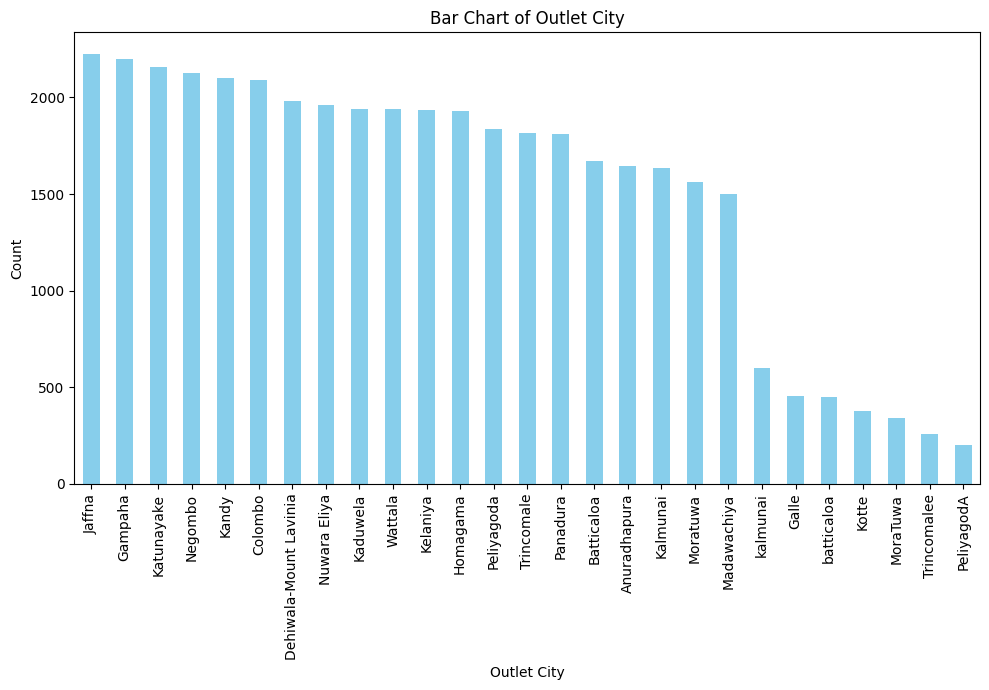

In [29]:
outlet_city_counts = kj_test["outlet_city"].value_counts()

plt.figure(figsize = (10,7))
outlet_city_counts.plot(kind = "bar", color = "skyblue")
plt.title("Bar Chart of Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

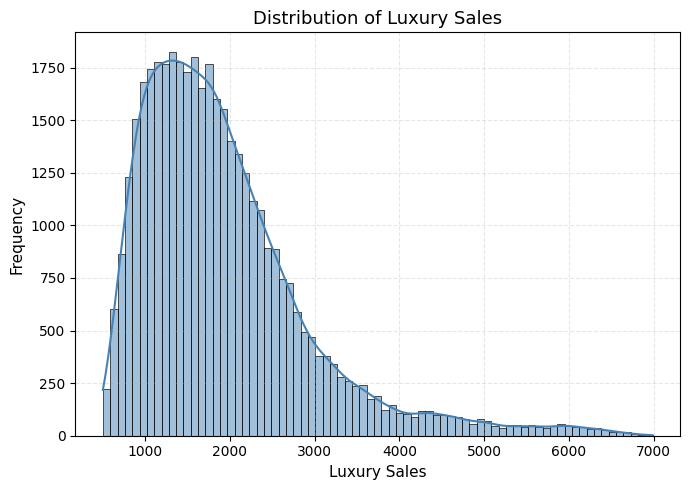

Luxury Sales 
 Mean value: 1927.068008294682 
 Median value: 1721.72 
 Mode value: 1801.8


In [32]:
plt.figure(figsize = [7,5])
sns.histplot(data = kj_test, bins = 75, x = "luxury_sales", kde = True, color = "steelblue")
plt.title("Distribution of Luxury Sales", fontsize = 13)
plt.xlabel("Luxury Sales", fontsize = 11)
plt.ylabel("Frequency", fontsize = 11)
plt.grid(True, linestyle = '--', alpha =0.3)
plt.tight_layout()
plt.show()

print(f"Luxury Sales \n Mean value: {kj_test['luxury_sales'].mean()} \n Median value: {kj_test['luxury_sales'].median()} \n Mode value: {kj_test['luxury_sales'].mode()[0]}")

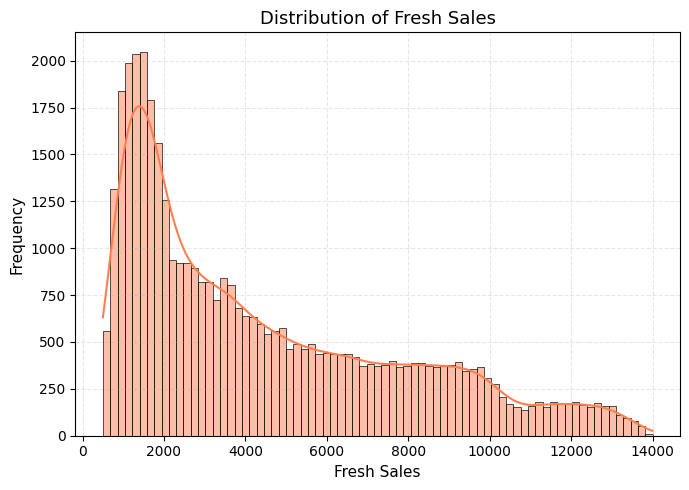

Fresh Sales 
 Mean value: 4442.969840977693 
 Median value: 3369.06 
 Mode value: 897.0


In [33]:
plt.figure(figsize = [7,5])
sns.histplot(data = kj_test, bins = 75, x = "fresh_sales", kde = True, color = "coral")
plt.title("Distribution of Fresh Sales", fontsize = 13)
plt.xlabel("Fresh Sales", fontsize = 11)
plt.ylabel("Frequency", fontsize = 11)
plt.grid(True, linestyle = '--', alpha =0.3)
plt.tight_layout()
plt.show()

print(f"Fresh Sales \n Mean value: {kj_test['fresh_sales'].mean()} \n Median value: {kj_test['fresh_sales'].median()} \n Mode value: {kj_test['fresh_sales'].mode()[0]}")

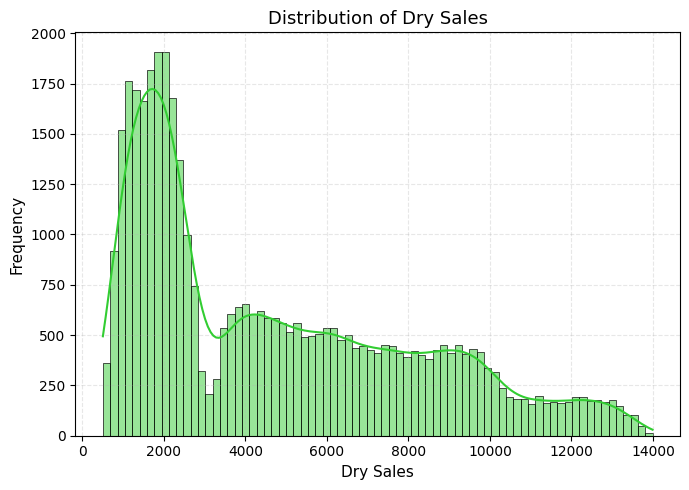

Dry Sales 
 Mean value: 4691.508888070873 
 Median value: 3755.34 
 Mode value: 1327.2


In [34]:
plt.figure(figsize = [7,5])
sns.histplot(data = kj_test, bins = 75, x = "dry_sales", kde = True, color = "limegreen")
plt.title("Distribution of Dry Sales", fontsize = 13)
plt.xlabel("Dry Sales", fontsize = 11)
plt.ylabel("Frequency", fontsize = 11)
plt.grid(True, linestyle = '--', alpha =0.3)
plt.tight_layout()
plt.show()

print(f"Dry Sales \n Mean value: {kj_test['dry_sales'].mean()} \n Median value: {kj_test['dry_sales'].median()} \n Mode value: {kj_test['dry_sales'].mode()[0]}")

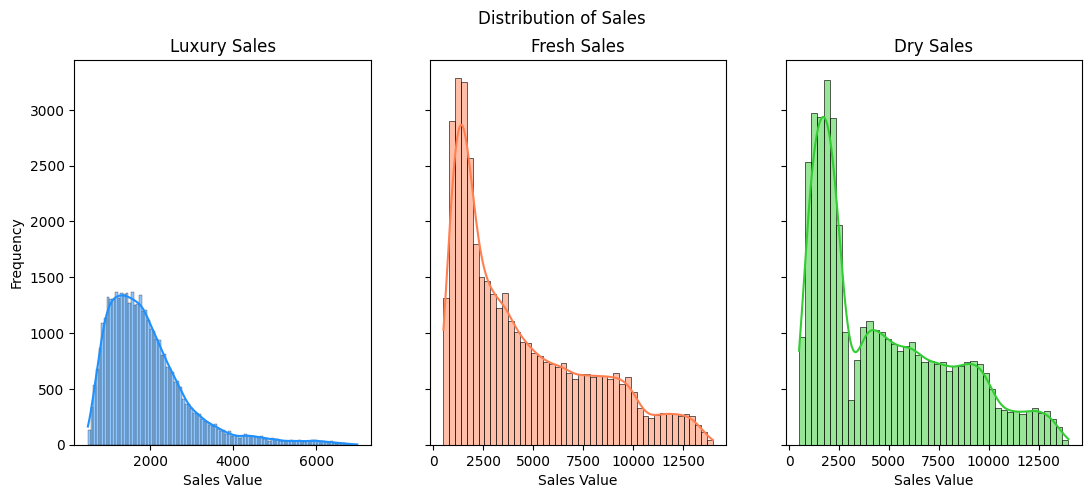

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5), sharey=True)
fig.suptitle("Distribution of Sales")

sns.histplot(kj_test["luxury_sales"], ax=axes[0], color="dodgerblue", kde=True)
axes[0].set_title("Luxury Sales")
axes[0].set_xlabel("Sales Value")
axes[0].set_ylabel("Frequency")

sns.histplot(kj_test["fresh_sales"], ax=axes[1], color="coral", kde=True)
axes[1].set_title("Fresh Sales")
axes[1].set_xlabel("Sales Value")

sns.histplot(kj_test["dry_sales"], ax=axes[2], color="limegreen", kde=True)
axes[2].set_title("Dry Sales")
axes[2].set_xlabel("Sales Value")

plt.show()

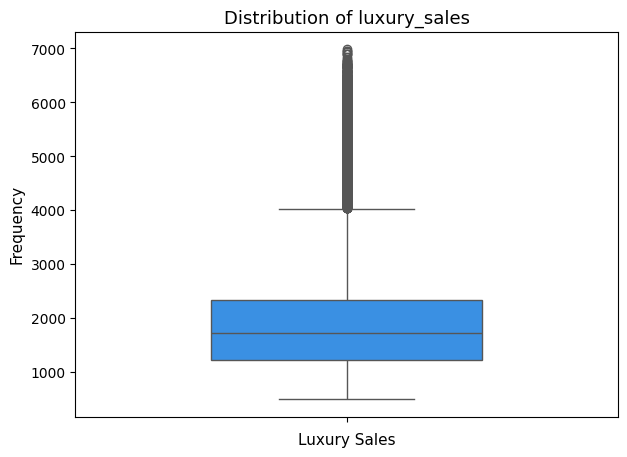

In [37]:
# Checking outliers for luxury_sales column
plt.figure(figsize = [7,5])
sns.boxplot(data = kj_test, y = "luxury_sales", color = "dodgerblue", width = 0.5)
plt.title("Distribution of luxury_sales", fontsize = 13)
plt.xlabel("Luxury Sales", fontsize = 11)
plt.ylabel("Frequency", fontsize = 11)
plt.show()

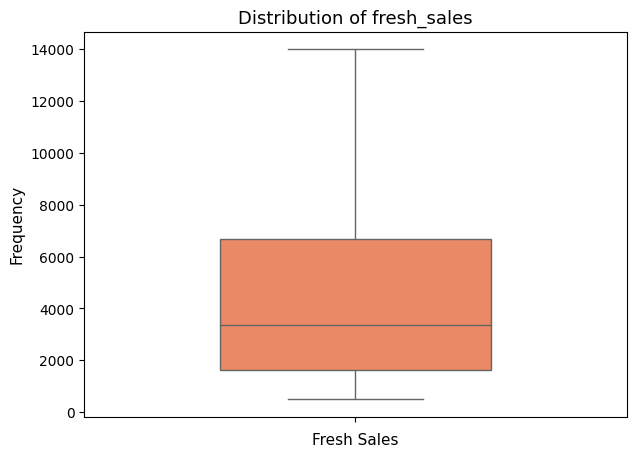

In [39]:
# Checking outliers for fresh_sales column
plt.figure(figsize = [7,5])
sns.boxplot(data = kj_test, y = "fresh_sales", color = "coral", width = 0.5)
plt.title('Distribution of fresh_sales', fontsize = 13)
plt.xlabel('Fresh Sales', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.show()

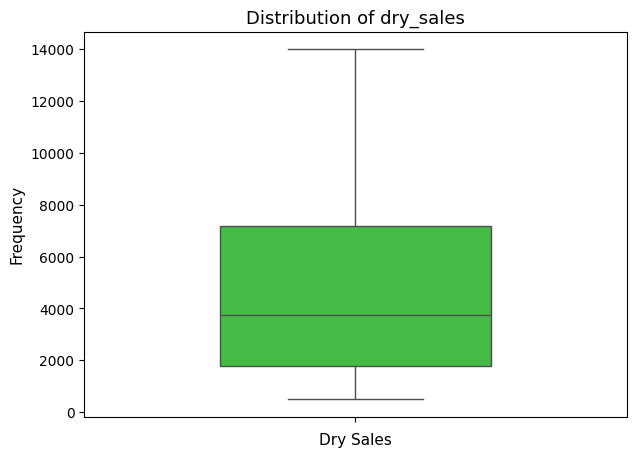

In [ ]:
# Checking outliers for dry_sales column
plt.figure(figsize = [7,5])
sns.boxplot(data = kj_test, y = 'dry_sales', color = 'limegreen', width = 0.5)
plt.title('Distribution of dry_sales', fontsize = 13)
plt.xlabel('Dry Sales', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.show()

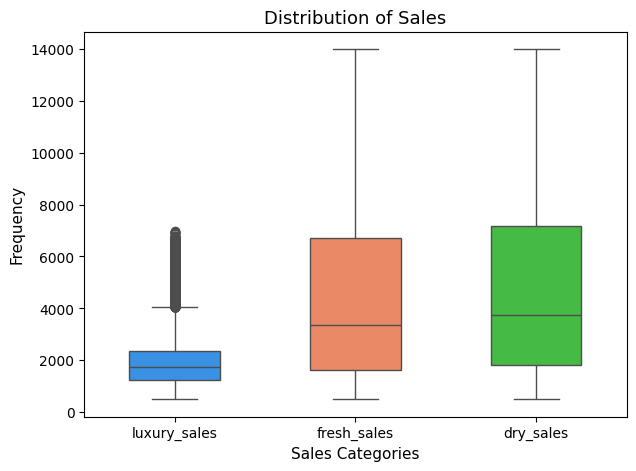

In [ ]:
plt.figure(figsize = [7, 5])
sns.boxplot(data = kj_test[['luxury_sales', 'fresh_sales', 'dry_sales']],
            palette = ['dodgerblue', 'coral', 'limegreen'], width = 0.5)
plt.title('Distribution of Sales', fontsize = 13)
plt.xlabel('Sales Categories', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.show()

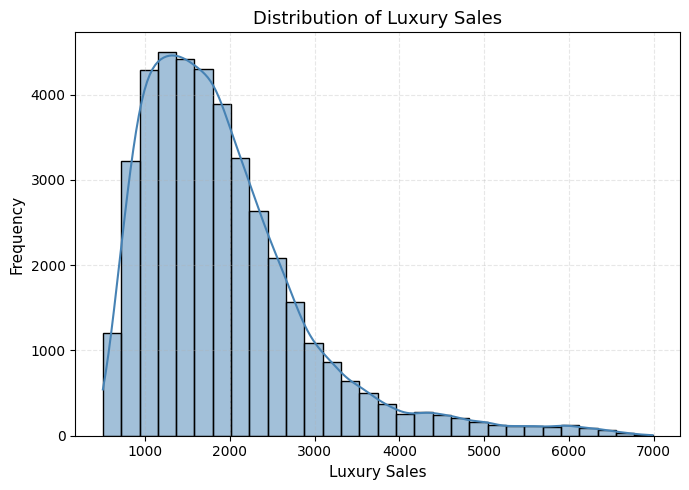

In [ ]:
plt.figure(figsize = [7,5])
sns.histplot(data = kj_test, bins = 30, x = 'luxury_sales', kde = True, color = 'steelblue')
plt.title('Distribution of Luxury Sales', fontsize = 13)
plt.xlabel('Luxury Sales', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.grid(True, linestyle = '--', alpha =0.3)
plt.tight_layout()
plt.show()

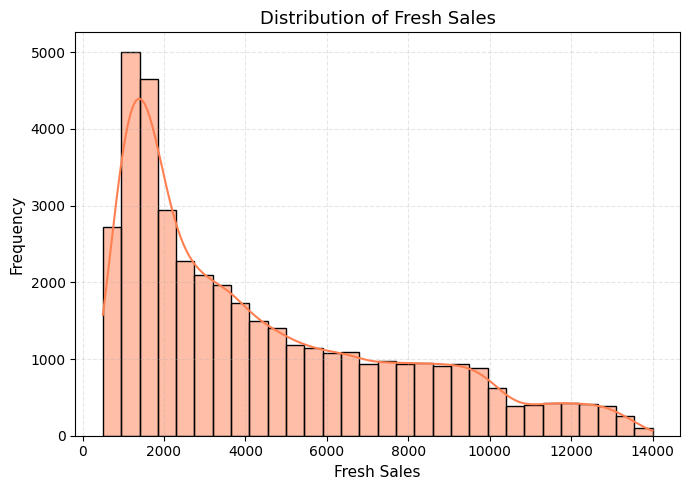

In [ ]:
plt.figure(figsize = [7,5])
sns.histplot(data = kj_test, bins = 30, x = 'fresh_sales', kde = True, color = 'coral')
plt.title('Distribution of Fresh Sales', fontsize = 13)
plt.xlabel('Fresh Sales', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.grid(True, linestyle = '--', alpha =0.3)
plt.tight_layout()
plt.show()

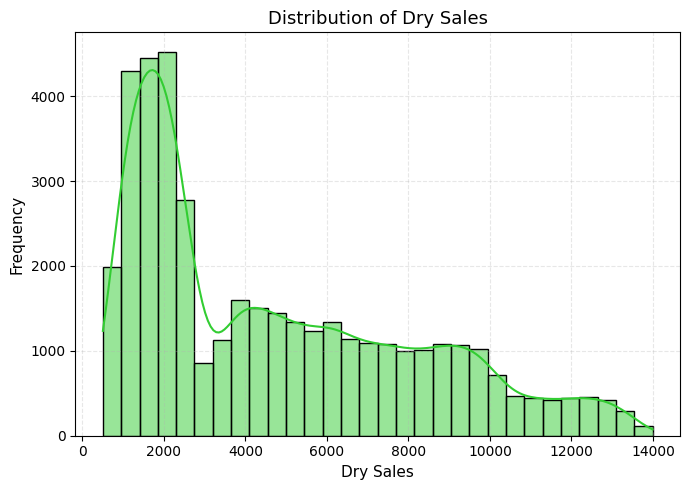

In [ ]:
plt.figure(figsize = [7,5])
sns.histplot(data = kj_test, bins = 30, x = 'dry_sales', kde = True, color = 'limegreen')
plt.title('Distribution of Dry Sales', fontsize = 13)
plt.xlabel('Dry Sales', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.grid(True, linestyle = '--', alpha =0.3)
plt.tight_layout()
plt.show()

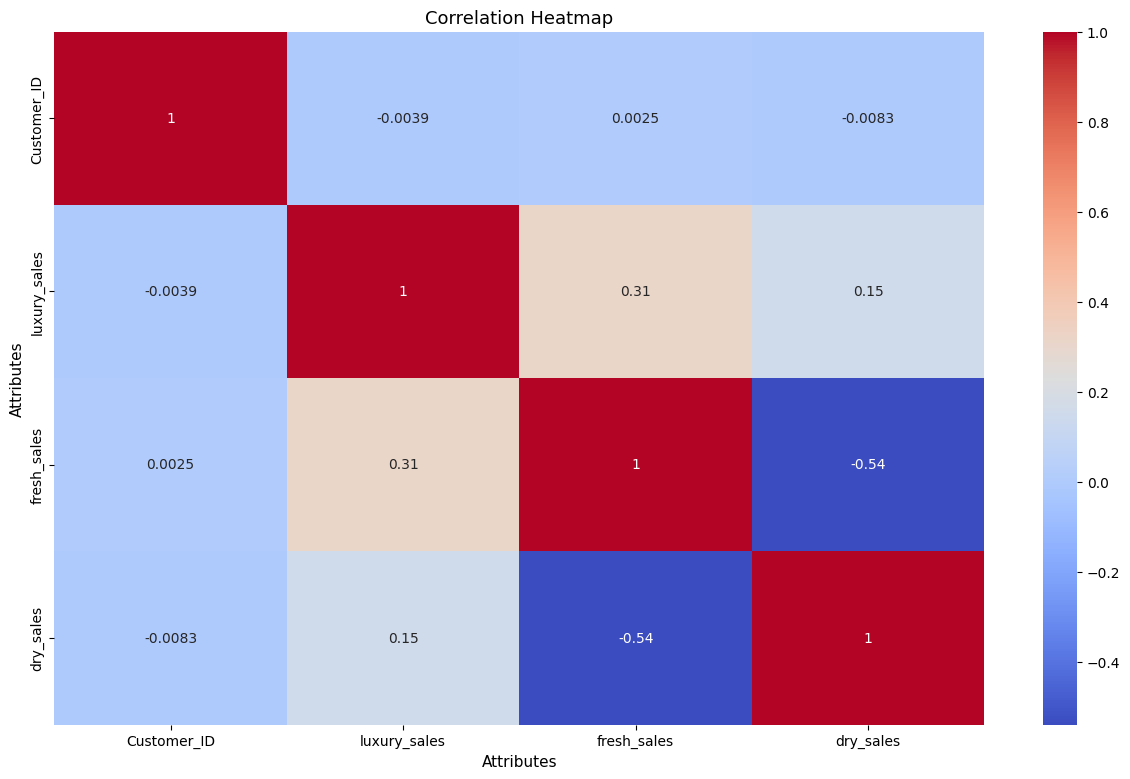

In [ ]:
correlation = kj_test.select_dtypes(include = np.number).corr()

plt.figure(figsize = [15,9])
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.xlabel('Attributes', fontsize = 11)
plt.ylabel('Attributes', fontsize = 11)
plt.title('Correlation Heatmap', fontsize = 13)
plt.show()

**Data Cleaning**

In [ ]:
# Changing the data type of the Customer_ID column
kj_test["Customer_ID"] = kj_test["Customer_ID"].astype(str)
kj_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer_ID   40749 non-null  object 
 1   outlet_city   40749 non-null  object 
 2   luxury_sales  40749 non-null  float64
 3   fresh_sales   40749 non-null  float64
 4   dry_sales     40749 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.6+ MB


In [ ]:
# Renaming the column name
kj_test = kj_test.rename(columns = {'Customer_ID':'customer_id'})
kj_test.head(2)

,customer_id,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.50,3582.00,12537.00
1,10089,batticaloa,1717.56,2576.34,9446.58


In [ ]:
# Cleaning inconsistency datas
# Renaming the values in the outlet_city column
kj_test["outlet_city"] = kj_test["outlet_city"].replace({"PeliyagodA":"Peliyagoda",
                                                         "Trincomale":"Trincomalee",
                                                         "batticaloa":"Batticaloa",
                                                         "kalmunai":"Kalmunai",
                                                         "MoraTuwa":"Moratuwa",
                                                         "Madawachiya":"Medawachchiya"})

print(f"Number of outlets: {len(kj_test['outlet_city'].unique())}")
print(kj_test["outlet_city"].unique())

Number of outlets: 22
['Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia' 'Anuradhapura' 'Galle'
 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela' 'Kalmunai' 'Kandy' 'Katunayake'
 'Kelaniya' 'Medawachchiya' 'Kotte' 'Moratuwa' 'Negombo' 'Nuwara Eliya'
 'Panadura' 'Peliyagoda' 'Trincomalee' 'Wattala']


In [ ]:
kj_test["outlet_city"].value_counts()

,count
outlet_city,
Kalmunai,2233
Jaffna,2226
Gampaha,2198
Katunayake,2157
Negombo,2129
Batticaloa,2119
Kandy,2101
Colombo,2092
Trincomalee,2072


In [ ]:
kj_test.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,40749,40749,33574,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outlet_city,40749,22,Kalmunai,2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
luxury_sales,40749.0,NaN,NaN,NaN,1927.068008,1003.797058,500.8,1220.4,1721.72,2346.12,6985.65
fresh_sales,40749.0,NaN,NaN,NaN,4442.969841,3349.438752,500.3,1619.55,3369.06,6697.14,13995.1
dry_sales,40749.0,NaN,NaN,NaN,4691.508888,3410.980901,500.9,1799.52,3755.34,7183.44,13989.5


In [ ]:
kj_test["customer_id"].duplicated().sum()

0

In [ ]:
# Summary statistics for numeric data type columns after cleaning process
kj_test.describe()

,luxury_sales,fresh_sales,dry_sales
count,40749.000000,40749.000000,40749.000000
mean,1927.068008,4442.969841,4691.508888
std,1003.797058,3349.438752,3410.980901
min,500.800000,500.300000,500.900000
25%,1220.400000,1619.550000,1799.520000
50%,1721.720000,3369.060000,3755.340000
75%,2346.120000,6697.140000,7183.440000
max,6985.650000,13995.100000,13989.500000


In [ ]:
# Summary statistics for object data type columns after cleaing process
kj_test.describe(include = object)

,customer_id,outlet_city
count,40749,40749
unique,40749,22
top,33574,Kalmunai
freq,1,2233


In [ ]:
kj_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   40749 non-null  object 
 1   outlet_city   40749 non-null  object 
 2   luxury_sales  40749 non-null  float64
 3   fresh_sales   40749 non-null  float64
 4   dry_sales     40749 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.6+ MB


In [ ]:
#Exploratory Data Analysis.

In [ ]:
#Bivariate Analysis

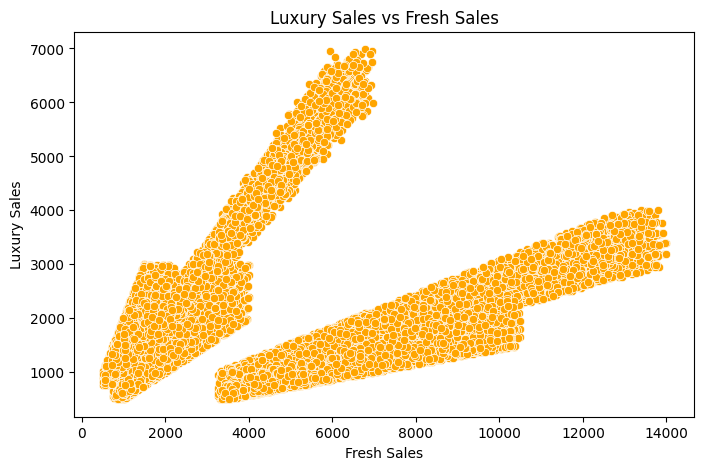

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='fresh_sales', y='luxury_sales', data=kj_test, color='orange')
plt.title('Luxury Sales vs Fresh Sales')
plt.xlabel('Fresh Sales')
plt.ylabel('Luxury Sales')
plt.show()


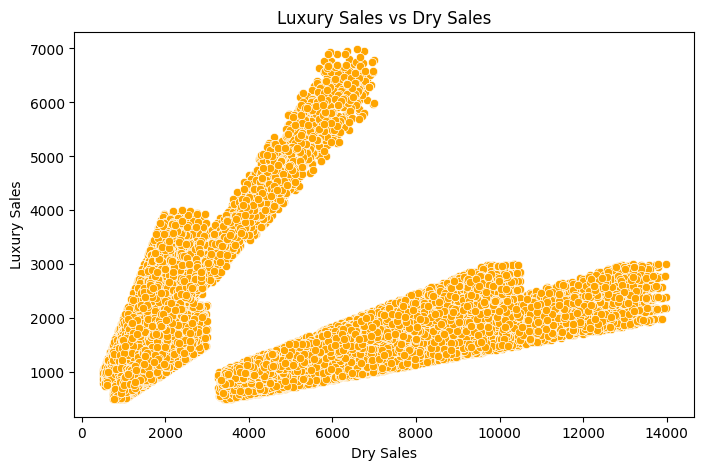

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='dry_sales', y='luxury_sales', data=kj_test, color='orange')
plt.title('Luxury Sales vs Dry Sales')
plt.xlabel('Dry Sales')
plt.ylabel('Luxury Sales')
plt.show()


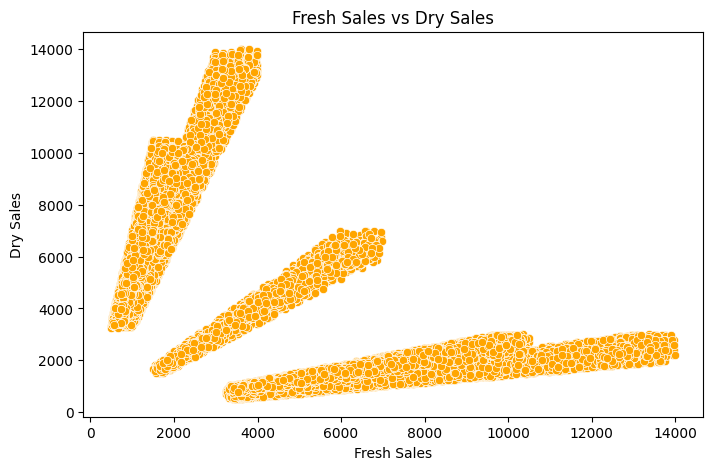

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='fresh_sales', y='dry_sales', data=kj_test, color='orange')
plt.title('Fresh Sales vs Dry Sales')
plt.xlabel('Fresh Sales')
plt.ylabel('Dry Sales')
plt.show()


In [ ]:
correlation = kj_test[['luxury_sales', 'fresh_sales', 'dry_sales']].corr()
print(correlation)


              luxury_sales  fresh_sales  dry_sales
luxury_sales      1.000000     0.309740   0.152964
fresh_sales       0.309740     1.000000  -0.538506
dry_sales         0.152964    -0.538506   1.000000


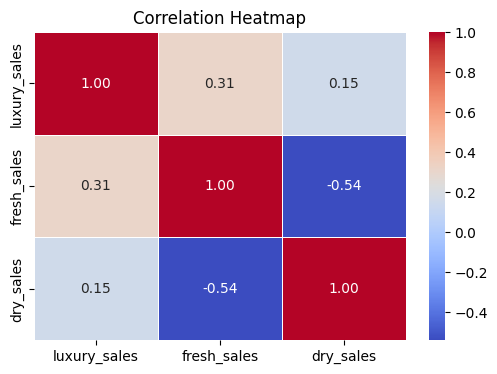

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
